In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pydub

In [ ]:
import pandas as pd
import uuid
import subprocess
from random import randint
import os
from pydub import AudioSegment 

In [ ]:


# #Extract the text file as csv 
# a=pd.read_csv('/content/drive/My Drive/Kadumane/Selections/P03929TEA1_20170505_113500.Table.1.selections.txt',sep="\t")

# a["Diff"]=a["End Time (s)"]-a["Begin Time (s)"]
# #Created a new column for time difference

# b=list(set(a["Notes"]))
# #created a set of all species,no repetition
# a['Begin Path'].values[0]

'D:\\IISER Work\\Kadumane\\drive-download-20170731T164806Z-001\\P03929TEA1_20170505_113500.wav'

In [ ]:
# path = "/content/drive/My Drive/winter/"
# music = "/content/drive/My Drive/Kadumane/P03929TEA1_20170505_070001.wav"
# c=a.groupby("Notes")
# for i in range(len(b)):
#     d=c.get_group(b[i])
#     # x=d.drop(['Selection', 'View', 'Channel', 'Low Freq (Hz)', 'High Freq (Hz)', 'Q1 Freq (Hz)', 'Q3 Freq (Hz)',
#     #    'Avg Power (dB)', 'Begin Date', 'Delta Time (s)', 'Begin File',
#     #    'Begin Path', 'Center Freq (Hz)', 'Delta Freq (Hz)'],axis=1)
# songarray = d['Begin Path'].values[0].split("\\")
# songpath = str(songarray[-2]+ "/" + songarray[-1])
# d

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Q1 Freq (Hz),Q3 Freq (Hz),Avg Power (dB),Begin Date,Delta Time (s),Begin File,Begin Path,Center Freq (Hz),Delta Freq (Hz),Notes,Diff
20,27,Spectrogram 1,1,269.811433,282.35618,6430.6,6757.5,6546.1,6653.8,49.0,NaN,12.545,P03929TEA1_20170505_113500.wav,D:\IISER Work\Kadumane\drive-download-20170731...,6610.7,326.9,INSECT_2,12.544747


In [ ]:
# path = "/content/drive/My Drive/Winter/"
# music = "/content/drive/My Drive/Kadumane/"
# c=a.groupby("Notes")
# for i in range(len(b)):
#     d = c.get_group(b[i])
#     d.drop(['Selection', 'View', 'Channel', 'Low Freq (Hz)', 'High Freq (Hz)', 'Q1 Freq (Hz)', 'Q3 Freq (Hz)',
#        'Avg Power (dB)', 'Begin Date', 'Delta Time (s)', 'Begin File', 'Center Freq (Hz)', 'Delta Freq (Hz)'],axis=1)
        
#     for j in range(len(d)):
#         songarray = d['Begin Path'].values[j].split("\\")
#         songpath = music + str(songarray[-2]+ "/" + songarray[-1])
#         start = d["Begin Time (s)"].values[j]  #starttime
#         end = d["End Time (s)"].values[j]   #endtime   
#         extraction = songpath
#         final = path + d['Notes'].values[j] + str(randint(100, 999))+str('.wav') 

#         startTime = start*1000
#         endTime = end*1000

#         # Opening file and extracting segment
#         song = AudioSegment.from_wav(songpath)
#         extract = song[startTime:endTime]
#         extract.export(final, format = "wav")


        
         


In [ ]:
!ls /content/drive/My\ Drive/Kadumane/Selections >> /content/drive/My\ Drive/Winter_text/a.txt

In [ ]:
w = pd.read_csv('/content/drive/My Drive/Winter_text/a.txt')
for k in range(len(w)):
  path = "/content/drive/My Drive/Winter/"
  music = "/content/drive/My Drive/Kadumane/"
  path_to_text = music + "Selections/" + w.values[k][0]
  a=pd.read_csv(path_to_text,sep="\t")

  a["Diff"]=a["End Time (s)"]-a["Begin Time (s)"]

  b=list(set(a["Notes"]))
  c=a.groupby("Notes")
  for i in range(len(b)):
      d = c.get_group(b[i])
      d.drop(['Selection', 'View', 'Channel', 'Low Freq (Hz)', 'High Freq (Hz)', 'Q1 Freq (Hz)', 'Q3 Freq (Hz)',
        'Avg Power (dB)', 'Begin Date', 'Delta Time (s)', 'Begin File', 'Center Freq (Hz)', 'Delta Freq (Hz)'],axis=1)
          
      for j in range(len(d)):
          songarray = d['Begin Path'].values[j].split("\\")
          songpath = music + str(songarray[-2]+ "/" + songarray[-1])
          start = d["Begin Time (s)"].values[j]  #starttime
          end = d["End Time (s)"].values[j]   #endtime   
          extraction = songpath
          final = path + d['Notes'].values[j] + str(randint(100, 999))+str('.wav') 

          startTime = start*1000
          endTime = end*1000

          # Opening file and extracting segment
          song = AudioSegment.from_wav(songpath)
          extract = song[startTime:endTime]
          extract.export(final, format = "wav")





In [ ]:
!ls /content/drive/My\ Drive/Winter >> /content/drive/My\ Drive/Winter_text/clips_name.txt

In [ ]:
path_to_clips = "/content/drive/My Drive/Winter_text/clips_name.txt"
clip = pd.read_csv(path_to_clips, names = ["File_name","Class"], sep = '\t')
for i in range(len(clip)):
  clip["Class"][i] = (clip["File_name"].values[i])[:-7]

clip.to_csv("/content/drive/My Drive/Winter_text/complete.csv")


In [ ]:
import tensorflow as tf
clip = pd.read_csv("/content/drive/My Drive/Winter_text/complete.csv")
a = list(set(clip["Class"]))
string = "/content/drive/My Drive/sound/"
for i in range(len(a)):
  new = string + a[i]
  tf.io.gfile.mkdir(new)
  new = string


# #Create a new directory (a folder) in your Drive
# for 
# tf.io.gfile.mkdir("/content/drive/My Drive/ahha")

In [ ]:
import tensorflow as tf
clip = pd.read_csv("/content/drive/My Drive/Winter_text/complete.csv")
a = list(set(clip["Class"]))
string = "/content/drive/My Drive/spectrogram/"
for i in range(len(a)):
  new = string + a[i]
  tf.io.gfile.mkdir(new)
  new = string


In [ ]:
import shutil
string = "/content/drive/My Drive/Winter/"
final = "/content/drive/My Drive/sound/"
for i in range(len(clip)):
  old = string + clip["File_name"][i]
  new = final + clip["Class"][i] 
  shutil.move(old, new)
  old = string
  new = final



In [ ]:
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np

In [ ]:

def create_spectrogram_train(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(name, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S
    
def create_spectrogram_test(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(name, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S



In [ ]:
clip = pd.read_csv("/content/drive/My Drive/Winter_text/complete.csv")
clip.values[0]


array([0, 'AFBB_1168.wav', 'AFBB_1'], dtype=object)

In [ ]:
train["File_name"]

Series([], Name: File_name, dtype: object)

In [ ]:
clip = pd.read_csv("/content/drive/My Drive/Winter_text/complete.csv")
from sklearn.utils import shuffle
clip = shuffle(clip)
patho = "/content/drive/My Drive/sound/"
pathn = "/content/drive/My Drive/spectrogram/"


for i in range(len(clip)):
  pathin = patho + clip["Class"][i] + "/" + clip["File_name"][i]
  pathout = pathn + clip["Class"][i] + "/" + clip["File_name"][i].split(".")[0]
  create_spectrogram_train(pathin,pathout)



In [ ]:
clip = pd.read_csv("/content/drive/My Drive/Winter_text/complete.csv")
clip

In [ ]:
# clip = clip.sort_values(by ='Unnamed: 0', ascending = 1)

In [ ]:
file_loc = []
for i in range(len(clip)):
  file_loc.append(pathn + clip["Class"][i] + "/" + clip['File_name'][i].split('.')[0] + ".png")

In [ ]:
clip["File_loc"] = file_loc

In [ ]:
clip.to_csv("/content/drive/My Drive/Winter_text/updated.csv")

# **Model Making**


In [ ]:
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

In [ ]:
len(os.listdir("/content/drive/My Drive/spectrogram/" + clip["Class"].values[0]))

31

In [ ]:
import numpy as np
import os
import cv2
path1 = "/content/drive/My Drive/spectrogram"
names = list(set(clip["Class"].values)) #names of birds
for i in range(len(names)):
    path2 = path1 + "/" + names[i] #path of each bird directory
    bird_names = os.listdir(path2) # files of each bird 
    for j in range(len(bird_names)):
        if (len(bird_names) >= 5):
            choice = np.random.choice(bird_names, int(len(bird_names)//1.25) , replace=False)
            for l in range(len(choice)):
                image = cv2.imread(path2 + "/" + choice[l])
                cv2.imwrite("/content/drive/My Drive/traintest/train/" + str(names[i]) + "_" + str(choice[l]) , image)
          
            for k in range(len(choice)):
                bird_names.remove(choice[k])
                
            for m in range(len(bird_names)):
                image2 = cv2.imread(path2 + "/" + bird_names[m] )
                cv2.imwrite("/content/drive/My Drive/traintest/test/" + str(names[i]) + "_" + str(bird_names[m]) , image2)
        else:
            for n in range(len(bird_names)):
                image3 = cv2.imread(path2 +"/" + bird_names[n])
                cv2.imwrite("/content/drive/My Drive/traintest/train/" + str(names[i]) + "_" + str(bird_names[n]) , image3)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [ ]:
!ls /content/drive/My\ Drive/traintest/train >> /content/drive/My\ Drive/Winter_text/traindata.txt

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Winter_text/traindata.txt",names = ["File_name"])
arr = []
for i in range(len(train)):
  arr.append(train.values[i][0])


In [ ]:
clas = []
for i in range(len(arr)):
  clas.append(arr[i][:-7][:int((len(arr[i][:-7])-1)/2)])

clas


In [ ]:
train = pd.DataFrame(data = arr,columns = ["File_name"])
train["Class"] = clas

In [ ]:
train.to_csv("/content/drive/My Drive/Winter_text/train.csv")

In [ ]:
!ls /content/drive/My\ Drive/traintest/test >> /content/drive/My\ Drive/Winter_text/testdata.txt

In [ ]:
test = pd.read_csv("/content/drive/My Drive/Winter_text/testdata.txt",names = ["File_name"])
arr = []
for i in range(len(test)):
  arr.append(test.values[i][0])

clas = []
for i in range(len(arr)):
  clas.append(arr[i][:-7][:int((len(arr[i][:-7])-1)/2)])

test = pd.DataFrame(data = arr,columns = ["File_name"])
test["Class"] = clas

test.to_csv("/content/drive/My Drive/Winter_text/test.csv")

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Winter_text/train.csv")
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img("/content/drive/My Drive/traintest/train/" + train["File_name"][i])
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1623/1623 [00:06<00:00, 237.53it/s]


In [ ]:
y=train['Class'].values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded, random_state=42, test_size=0.2)

In [ ]:
len(list(set(y)))

215

In [ ]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(217, 223, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(215, activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=(217, 223, 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(len(set(train['Class'])), activation='softmax'))
# model.name = '1st model'
# model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
# model.summary()


inputs = Input((217, 223, 3))
lr = 1e-4
backbone = MobileNetV2(input_tensor=inputs, include_top=False, weights="imagenet")
backbone.trainable = True
x = backbone.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dense(215, activation="softmax")(x)

model = tf.keras.Model(inputs, x)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr), metrics=["acc"])
model.summary()


In [ ]:

model.fit(X_train, y_train, epochs= 8, validation_data=(X_test, y_test))

Epoch 1/8
41/41 [==============================] - 225s 5s/step - loss: 4.5166 - acc: 0.0840 - val_loss: 4.4372 - val_acc: 0.1292
Epoch 2/8
41/41 [==============================] - 225s 5s/step - loss: 3.4074 - acc: 0.1995 - val_loss: 4.3507 - val_acc: 0.1446
Epoch 3/8
41/41 [==============================] - 222s 5s/step - loss: 2.8859 - acc: 0.2943 - val_loss: 4.1961 - val_acc: 0.1077
Epoch 4/8
41/41 [==============================] - 222s 5s/step - loss: 2.4415 - acc: 0.4076 - val_loss: 4.2477 - val_acc: 0.1323
Epoch 5/8
41/41 [==============================] - 223s 5s/step - loss: 1.9706 - acc: 0.5501 - val_loss: 4.4204 - val_acc: 0.1231
Epoch 6/8
41/41 [==============================] - 225s 5s/step - loss: 1.5703 - acc: 0.6726 - val_loss: 4.3496 - val_acc: 0.0985
Epoch 7/8
41/41 [==============================] - 224s 5s/step - loss: 1.1866 - acc: 0.7681 - val_loss: 4.3873 - val_acc: 0.0862
Epoch 8/8
41/41 [==============================] - 222s 5s/step - loss: 0.7999 - acc: 0.86

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Winter_text/test.csv')
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img("/content/drive/My Drive/traintest/test/" + test["File_name"][i])
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
tested = np.array(test_image)


100%|██████████| 294/294 [00:00<00:00, 301.40it/s]


In [ ]:
from keras.applications.mobilenet_v2 import decode_predictions
prediction = model.predict(tested)
print('Predicted:', decode_predictions(prediction))

# **New start**


In [ ]:
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

Using TensorFlow backend.


In [ ]:
!pip install tf-nightly

In [ ]:
image_size = (223,217)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/spectrogram",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1623 files belonging to 215 classes.
Using 1299 files for training.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 223, 217, None), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/spectrogram",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1623 files belonging to 215 classes.
Using 324 files for validation.


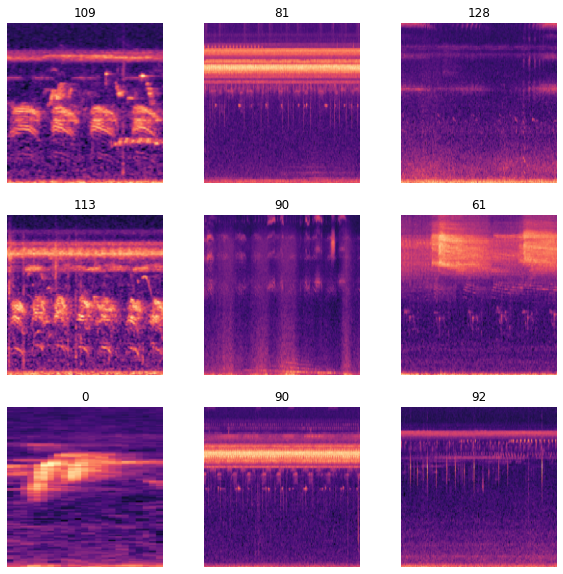

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

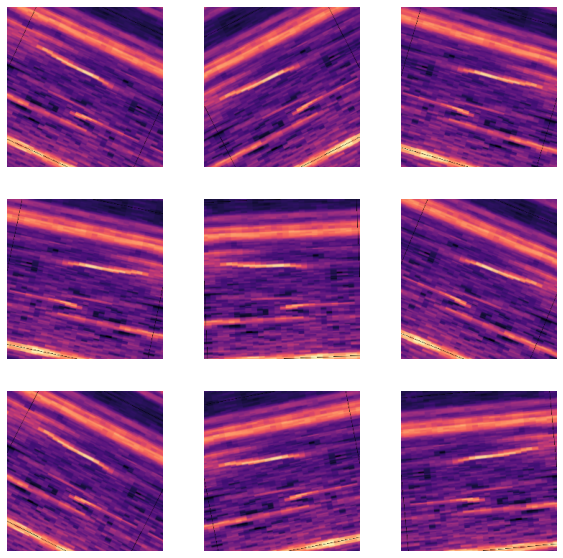

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

batch_size = 128
epochs = 15
IMG_HEIGHT = 223
IMG_WIDTH = 217
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data





In [ ]:
train = pd.read_csv("/content/drive/My Drive/Winter_text/train.csv")
train.columns
train.File_name[0]

'AFBB_1_AFBB_1168.png'

In [ ]:
train.columns

Index(['Unnamed: 0', 'File_name', 'Class'], dtype='object')

In [ ]:
trainpath = "/content/drive/My Drive/traintest/train/"


for i in range(len(train)):
  train['File_name'][i] = trainpath + train['File_name'][i]



# finaltrain = pd.DataFrame([a,classes])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
test = pd.read_csv("/content/drive/My Drive/Winter_text/test.csv")
testpath = "/content/drive/My Drive/traintest/test/"


for i in range(len(test)):
  test['File_name'][i] = testpath + test['File_name'][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data_gen = train_image_generator.flow_from_dataframe(dataframe=train, x_col="File_name", y_col="Class", class_mode="categorical", target_size=(32,32), batch_size=32)

Found 1623 validated image filenames belonging to 215 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_dataframe(dataframe=test, x_col="File_name", y_col="Class", class_mode="categorical", target_size=(32,32), batch_size=32)

Found 294 validated image filenames belonging to 48 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

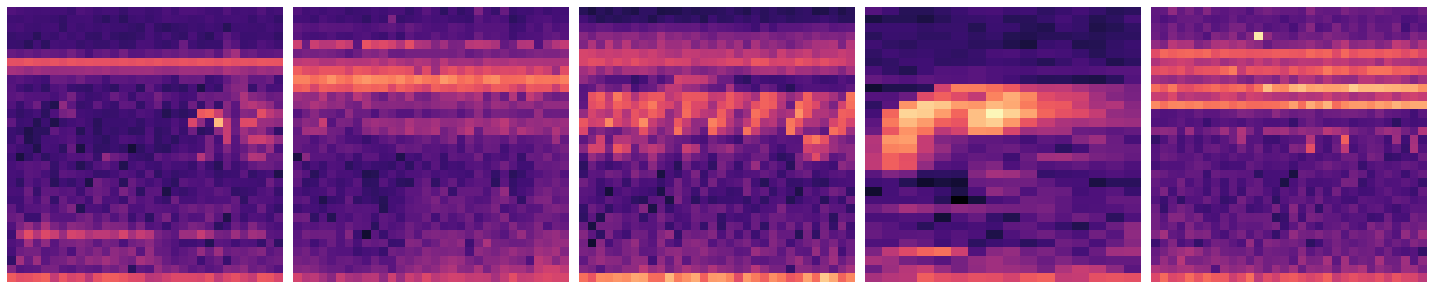

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
model = Sequential()
model.add(Conv2D(input_shape=(223,217,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=215, activation="softmax"))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 223, 217, 64)      1792      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 221, 215, 64)      36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 110, 107, 64)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 110, 107, 128)     73856     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 110, 107, 128)     147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 55, 53, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 55, 53, 256)     

In [ ]:
hist = model.fit_generator(steps_per_epoch=100,generator=train_data_gen, validation_data= val_data_gen, validation_steps=10,epochs=15)

Epoch 1/15


InvalidArgumentError: ignored

In [ ]:
!pip3 install git+https://github.com/keras-team/keras.git -U